### Monocle3 Pseudotime analysis on Glomeruli

Main Figure 5 and corresponding supplemental figures are generated

Author: Haojia Wu, Pierre Isnard, Dian Li

Contact: dianli@wustl.edu

Last updated: December 8, 2023

In [1]:
suppressMessages(library(Seurat))
suppressMessages(library(ggplot2))
suppressMessages(library(reshape2))
# library(EnhancedVolcano)
suppressMessages(library(dplyr))

suppressMessages(library(monocle3))
suppressMessages(library(SeuratWrappers))
suppressMessages(library(patchwork))
suppressMessages(library(magrittr))
# library(ComplexHeatmap)
# library(dichromat)
# library(RColorBrewer)

Warning message:
“multiple methods tables found for ‘aperm’”
Warning message:
“replacing previous import ‘BiocGenerics::aperm’ by ‘DelayedArray::aperm’ when loading ‘SummarizedExperiment’”


In [2]:
plots_path_main = "../../plots/version_1/main_figures"
plots_path_supp = "../../plots/version_1/supp_figures"
processed_data_path = "../../processed_data/version_1/Monocle3"

dir.create(plots_path_main, showWarnings = F, recursive = T)
dir.create(plots_path_supp, showWarnings = F, recursive = T)
dir.create(processed_data_path, showWarnings = F, recursive = T)

In [3]:
color_palette_glom = c("#fff088", 
                         "#c3ab00",
                         "#615500")
names(color_palette_glom) = c("DKDG",
                             "SGS",
                             "GGS")

### Step 1. Load dkd1_glom_avg Seurat object generated from Figure 4

In [4]:
dkd1_glom_avg = readRDS("../../processed_data/version_1/dkd1_glom_avg.RDS")

In [5]:
dkd1_glom_avg

head(dkd1_glom_avg)

An object of class Seurat 
18085 features across 82 samples within 1 assay 
Active assay: Spatial (18085 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

,orig.ident,nCount_Spatial,nFeature_Spatial,glom_id,glom_class,Spatial_snn_res.1.1,seurat_clusters
,<fct>,<dbl>,<int>,<chr>,<fct>,<fct>,<fct>
G2,Average,7699.333,8260,G2,DKDG,2,2
G3,Average,10356.667,9227,G3,DKDG,2,2
G5,Average,10821.000,9211,G5,DKDG,2,2
G6,Average,6700.000,4259,G6,DKDG,0,0
G9,Average,14804.600,11730,G9,DKDG,2,2
G10,Average,13052.000,10824,G10,DKDG,0,0
G11,Average,9356.667,9000,G11,DKDG,0,0
G12,Average,8778.333,8632,G12,DKDG,0,0
G13,Average,15630.333,10411,G13,DKDG,0,0


In [6]:
custom_theme <- theme(text = element_text(family = "Helvetica"))

empty_theme = theme(
    axis.line.x=element_blank(),
    axis.line.y=element_blank(),
      axis.text.x=element_blank(),
      axis.text.y=element_blank(),
      axis.ticks=element_blank(),
      axis.title.x=element_blank(),
      axis.title.y=element_blank())

In [7]:
Idents(dkd1_glom_avg) = factor(dkd1_glom_avg$glom_class, levels = c("DKDG", "SGS", "GGS"))

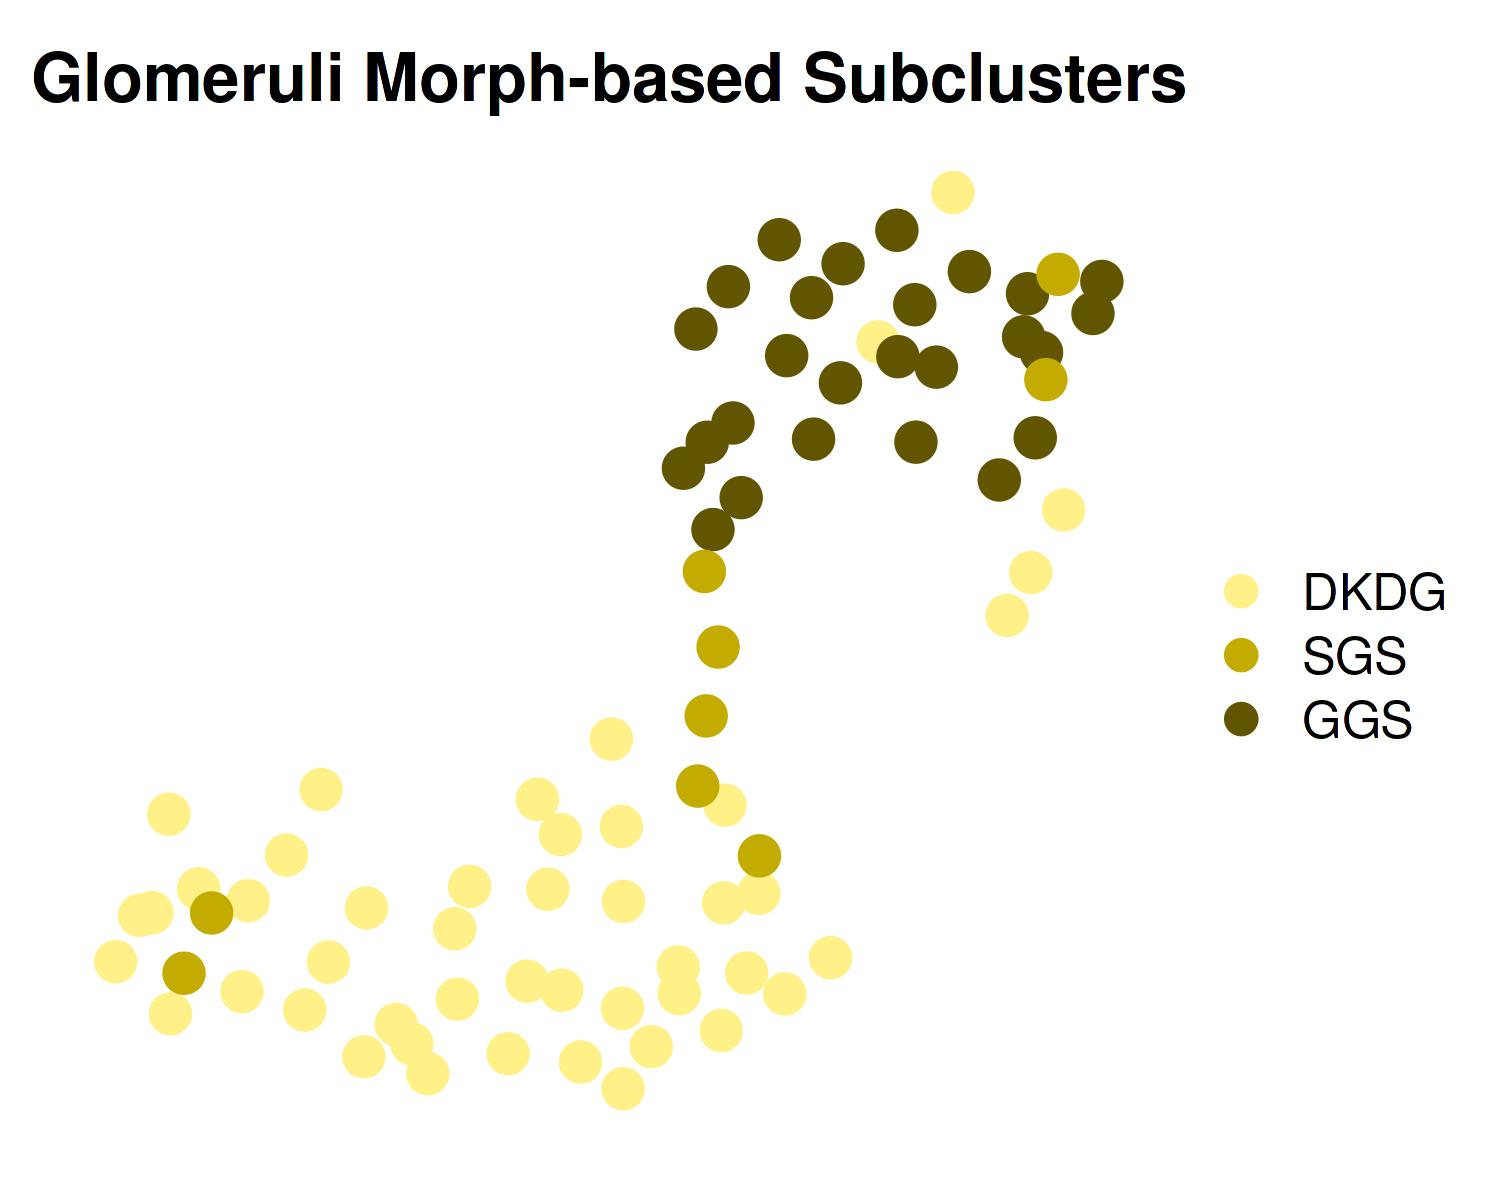

In [8]:
options(repr.plot.width = 5, repr.plot.height = 4, repr.plot.res = 300)
p = DimPlot(dkd1_glom_avg, group.by = "glom_class", pt.size = 4, cols = color_palette_glom)
p = p + custom_theme + empty_theme + ggtitle("Glomeruli Morph-based Subclusters")
p

### Step 2. Convert to cell_data_set object defined by monocle

In [9]:
cds <- as.cell_data_set(dkd1_glom_avg)

Warning message:
“Monocle 3 trajectories require cluster partitions, which Seurat does not calculate. Please run 'cluster_cells' on your cell_data_set object”


In [10]:
cds

class: cell_data_set 
dim: 18085 82 
metadata(0):
assays(3): counts logcounts scaledata
rownames(18085): SAMD11 NOC2L ... MT-ND6 MT-CYB
rowData names(0):
colnames(82): G2 G3 ... G71 G74
colData names(9): orig.ident nCount_Spatial ... ident Size_Factor
reducedDimNames(2): PCA UMAP
mainExpName: Spatial
altExpNames(0):

#### Step 2.1. Create rowData for cds as it's missing after conversion

In [11]:
rowData_df = data.frame("gene_short_name" = names(cds@rowRanges))
rownames(rowData_df) = rowData_df$gene_short_name

In [12]:
rowData(cds) = rowData_df

### Step 3. run cluster_cells

In [13]:
cds <- cluster_cells(cds, resolution=0.05)

In [14]:
cds <- learn_graph(cds,use_partition = TRUE, verbose = FALSE, learn_graph_control=list(minimal_branch_len=20))

Warning message in igraph::graph.dfs(stree_ori, root = root_cell, neimode = "all", :
“Argument `neimode' is deprecated; use `mode' instead”


### Step 4. Visualize pseudotime trajectory

In [15]:
# p1<-plot_cells(cds, label_groups_by_cluster = T, label_leaves = FALSE, label_branch_points = FALSE,label_roots = F,
#            cell_size = 3, trajectory_graph_color = "navy",   trajectory_graph_segment_size = 3)
# p1 = p1 + custom_theme + empty_theme + ggtitle("Glomeruli Morph-based Subclusters")

In [16]:
cds <- order_cells(cds, root_cells = colnames(cds[,clusters(cds) == 1]))

In [17]:
color_palette_glom

DKDG       SGS       GGS 
"#fff088" "#c3ab00" "#615500"

In [18]:
library(viridis)

Loading required package: viridisLite



Warning message:
“`select_()` was deprecated in dplyr 0.7.0.
ℹ Please use `select()` instead.
ℹ The deprecated feature was likely used in the monocle3 package.
  Please report the issue to the authors.”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


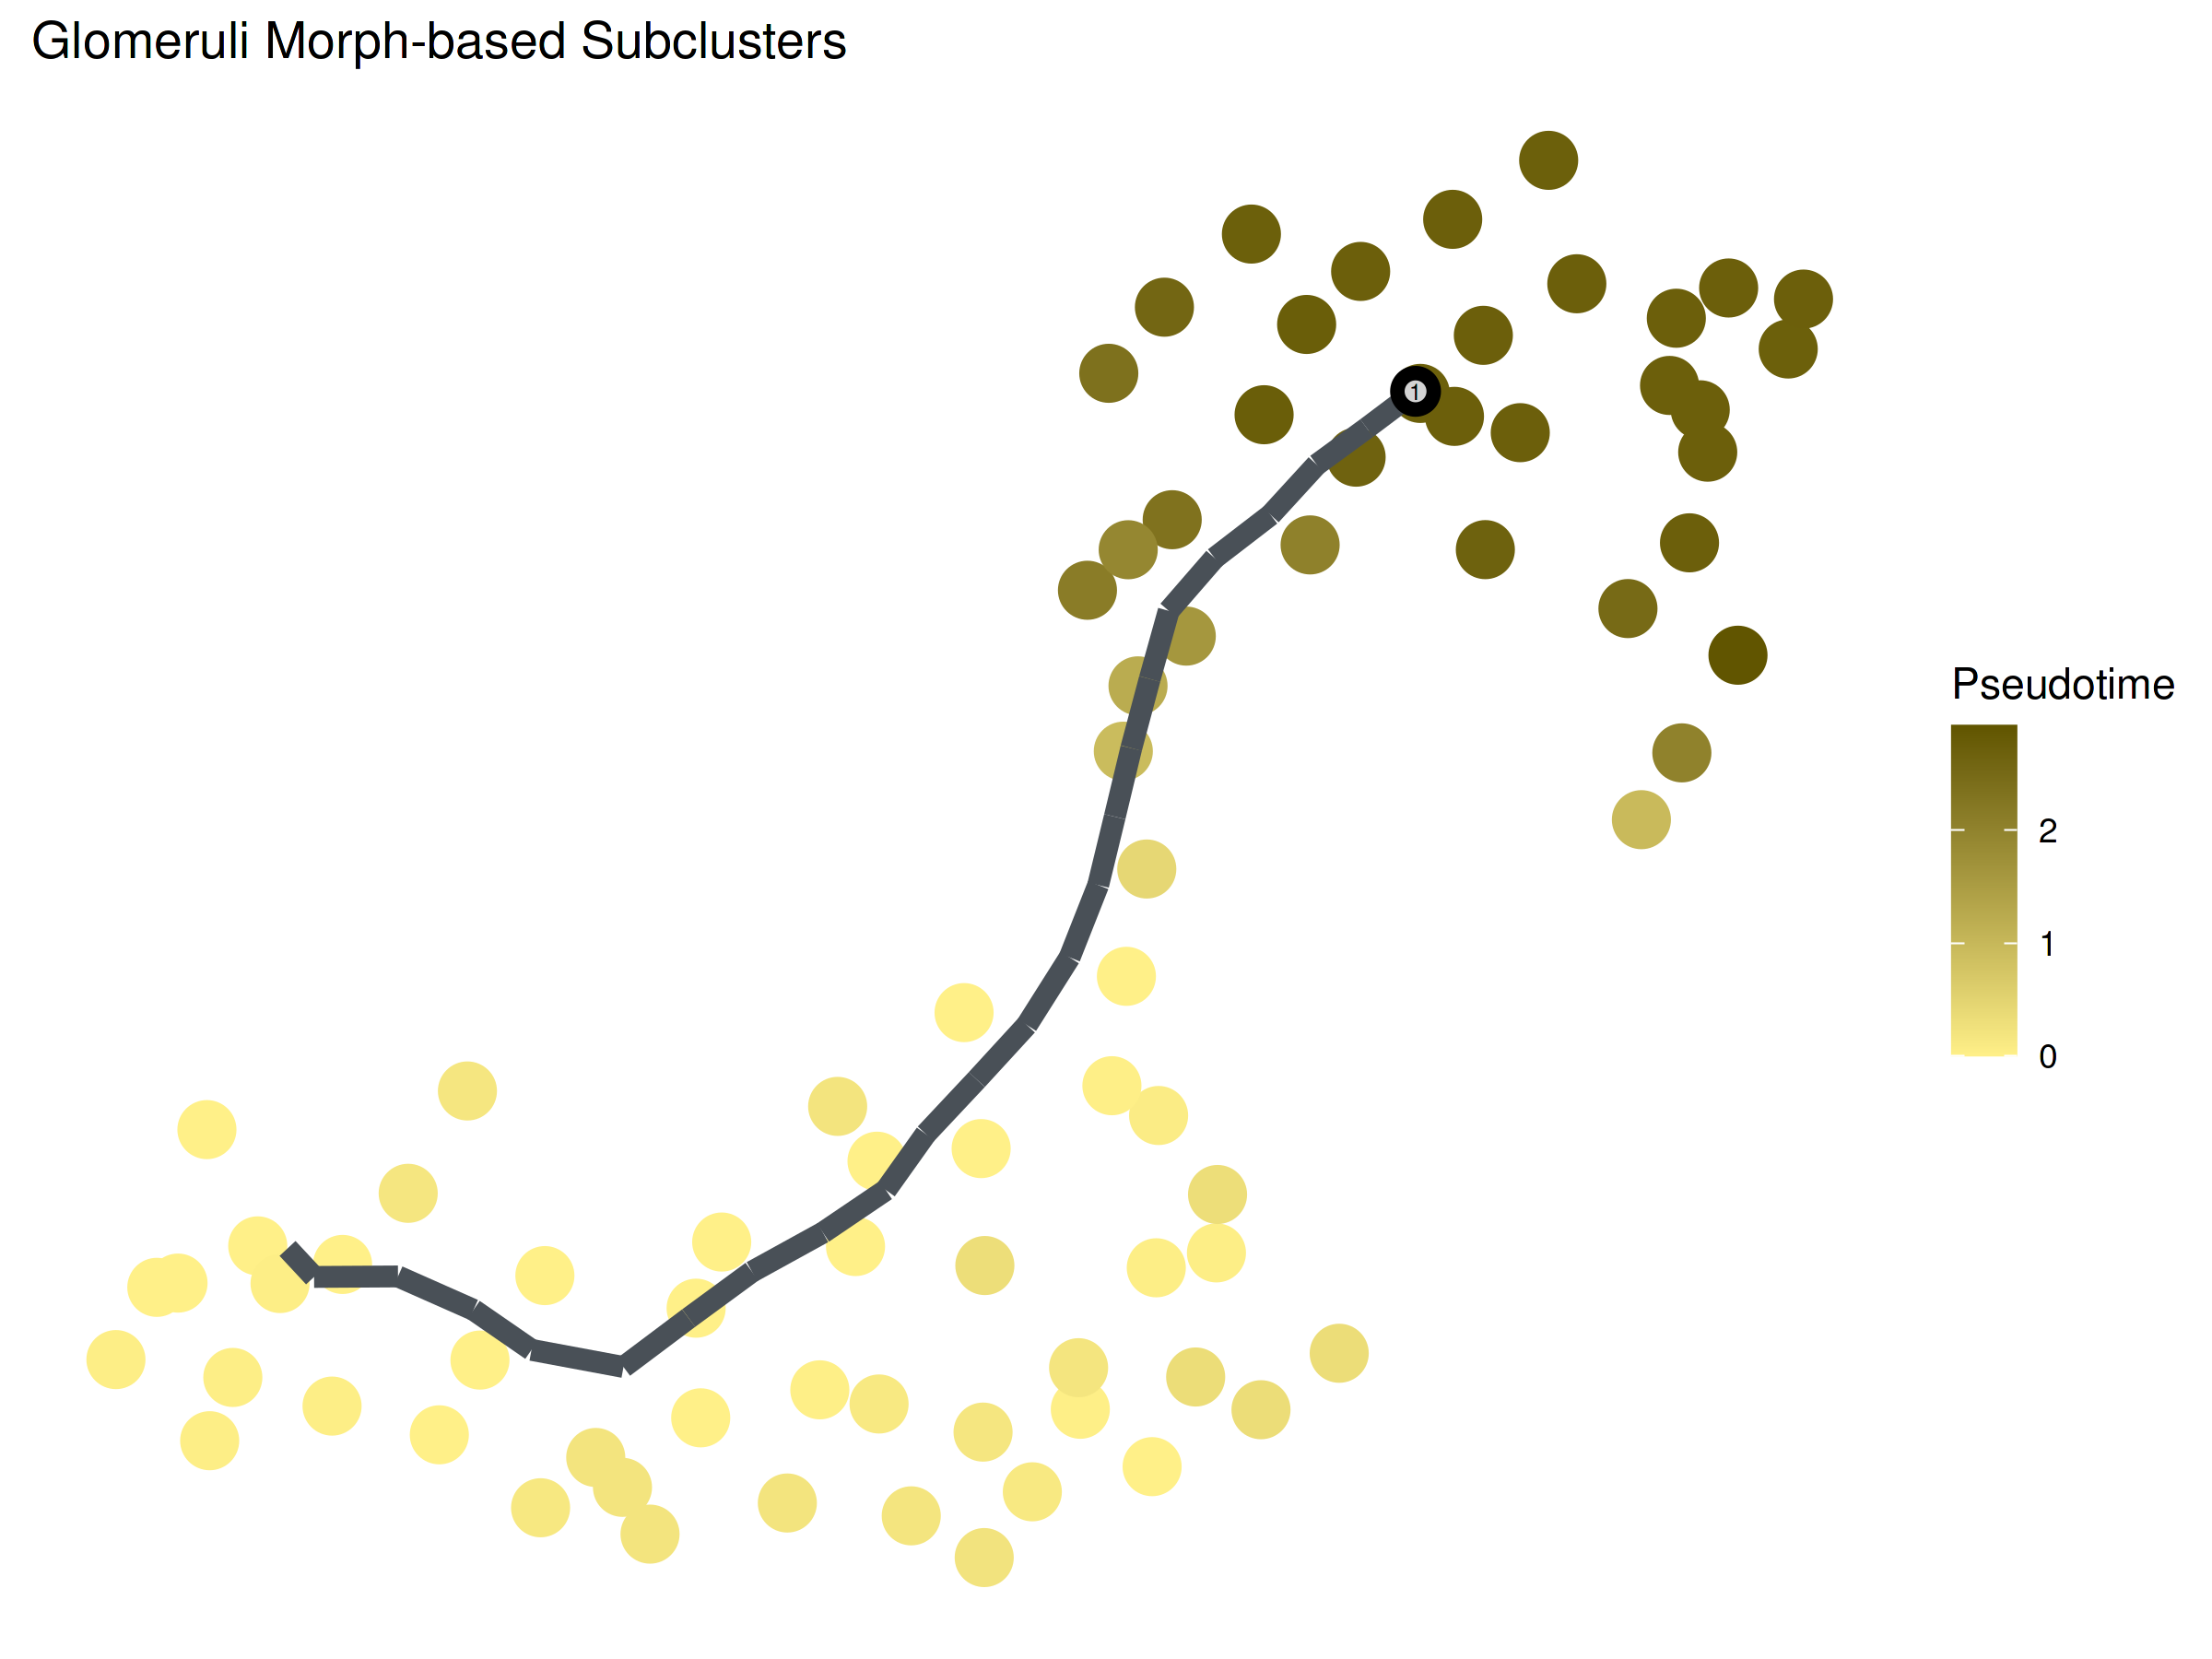

In [19]:
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 300)
p <- plot_cells(cds, color_cells_by = "pseudotime", 
                label_cell_groups = FALSE, 
                label_leaves = TRUE, 
                label_roots = FALSE ,
                label_branch_points = FALSE,
                cell_size = 4, 
                trajectory_graph_color = "#495057",   
                trajectory_graph_segment_size = 2)
p = p + custom_theme + empty_theme + 
ggtitle("Glomeruli Morph-based Subclusters")  +
scale_color_gradient2 (low=color_palette_glom[1], mid=color_palette_glom[1], high=color_palette_glom[3], name = "Pseudotime")

# p + scale_fill_viridis_c(option = "viridis")
p
ggsave(file.path(plots_path_main, "monocle3_glom_avg.png"), plot = p, width = 8, height = 6, units = "in", dpi = 300)
ggsave(file.path(plots_path_main, "monocle3_glom_avg.pdf"), plot = p, width = 8, height = 6, units = "in", dpi = 300)
ggsave(file.path(plots_path_main, "monocle3_glom_avg.svg"), plot = p, width = 8, height = 6, units = "in", dpi = 300)

### Step 5. Graph-autocorrelation analysis

In [20]:
modulated_genes <- graph_test(cds, neighbor_graph = "principal_graph", cores = 12)

  |=======================================================| 100%, Elapsed 00:07


In [21]:
modulated_genes_subset <- subset(modulated_genes, q_value < 0.05 & morans_I > 0.25 & status == "OK")
modulated_genes_subset$morans_I_logq = modulated_genes_subset$morans_I * -log10(modulated_genes_subset$q_value)
modulated_genes_subset = modulated_genes_subset[order(modulated_genes_subset$morans_I_logq, decreasing = T), ]
dim(modulated_genes_subset)
head(modulated_genes_subset,10)

[1] 397   7

,status,p_value,morans_test_statistic,morans_I,gene_short_name,q_value,morans_I_logq
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
NPHS2,OK,1.181614e-59,16.24654,0.8380261,NPHS2,1.058903e-55,46.07060
PODXL,OK,3.176075e-56,15.75494,0.8134212,PODXL,1.897493e-52,42.07162
PTPRO,OK,2.172286e-48,14.57023,0.7504855,PTPRO,9.733469e-45,33.03017
MME,OK,3.124801e-48,14.54537,0.7486341,MME,1.120116e-44,32.90302
CLIC5,OK,1.356250e-46,14.28504,0.7361871,CLIC5,3.472582e-43,31.25802
TPPP3,OK,1.237740e-46,14.29141,0.7338690,TPPP3,3.472582e-43,31.15960
VEGFA,OK,3.210076e-46,14.22489,0.7318921,VEGFA,7.191773e-43,30.84425
SPOCK1,OK,8.806890e-46,14.15412,0.7299294,SPOCK1,1.753843e-42,30.47894
MMD2,OK,1.708761e-60,16.36469,0.5224078,MMD2,3.062612e-56,29.00090


In [22]:
genes = rownames(modulated_genes_subset)

In [23]:
pt.matrix <- exprs(cds)[match(genes,rownames(rowData(cds))),order(pseudotime(cds))]
#Can also use "normalized_counts" instead of "exprs" to use various normalization methods, for example:
#normalized_counts(cds, norm_method = "log")

In [24]:
pt.matrix <- t(apply(pt.matrix,1,function(x){smooth.spline(x,df=3)$y}))
pt.matrix <- t(apply(pt.matrix,1,function(x){(x-mean(x))/sd(x)}))
rownames(pt.matrix) <- genes;

colnames(pt.matrix) = rownames(colData(cds))

In [25]:
suppressMessages(library(ComplexHeatmap))
suppressMessages(library(RColorBrewer))
suppressMessages(library(circlize))

In [26]:
#Ward.D2 Hierarchical Clustering
hthc <- Heatmap(
  pt.matrix,
  name                         = "z-score",
  col                          = colorRamp2(seq(from=-2,to=2,length=11),rev(brewer.pal(11, "RdYlBu"))),
  show_row_names               = TRUE,
  show_column_names            = TRUE,
  row_names_gp                 = gpar(fontsize = 6),
  clustering_method_rows = "ward.D2",
#   clustering_method_columns = "ward.D2",
  row_title_rot                = 0,
  cluster_rows                 = TRUE,
  cluster_row_slices           = FALSE,
  cluster_columns              = FALSE,
use_raster = FALSE)

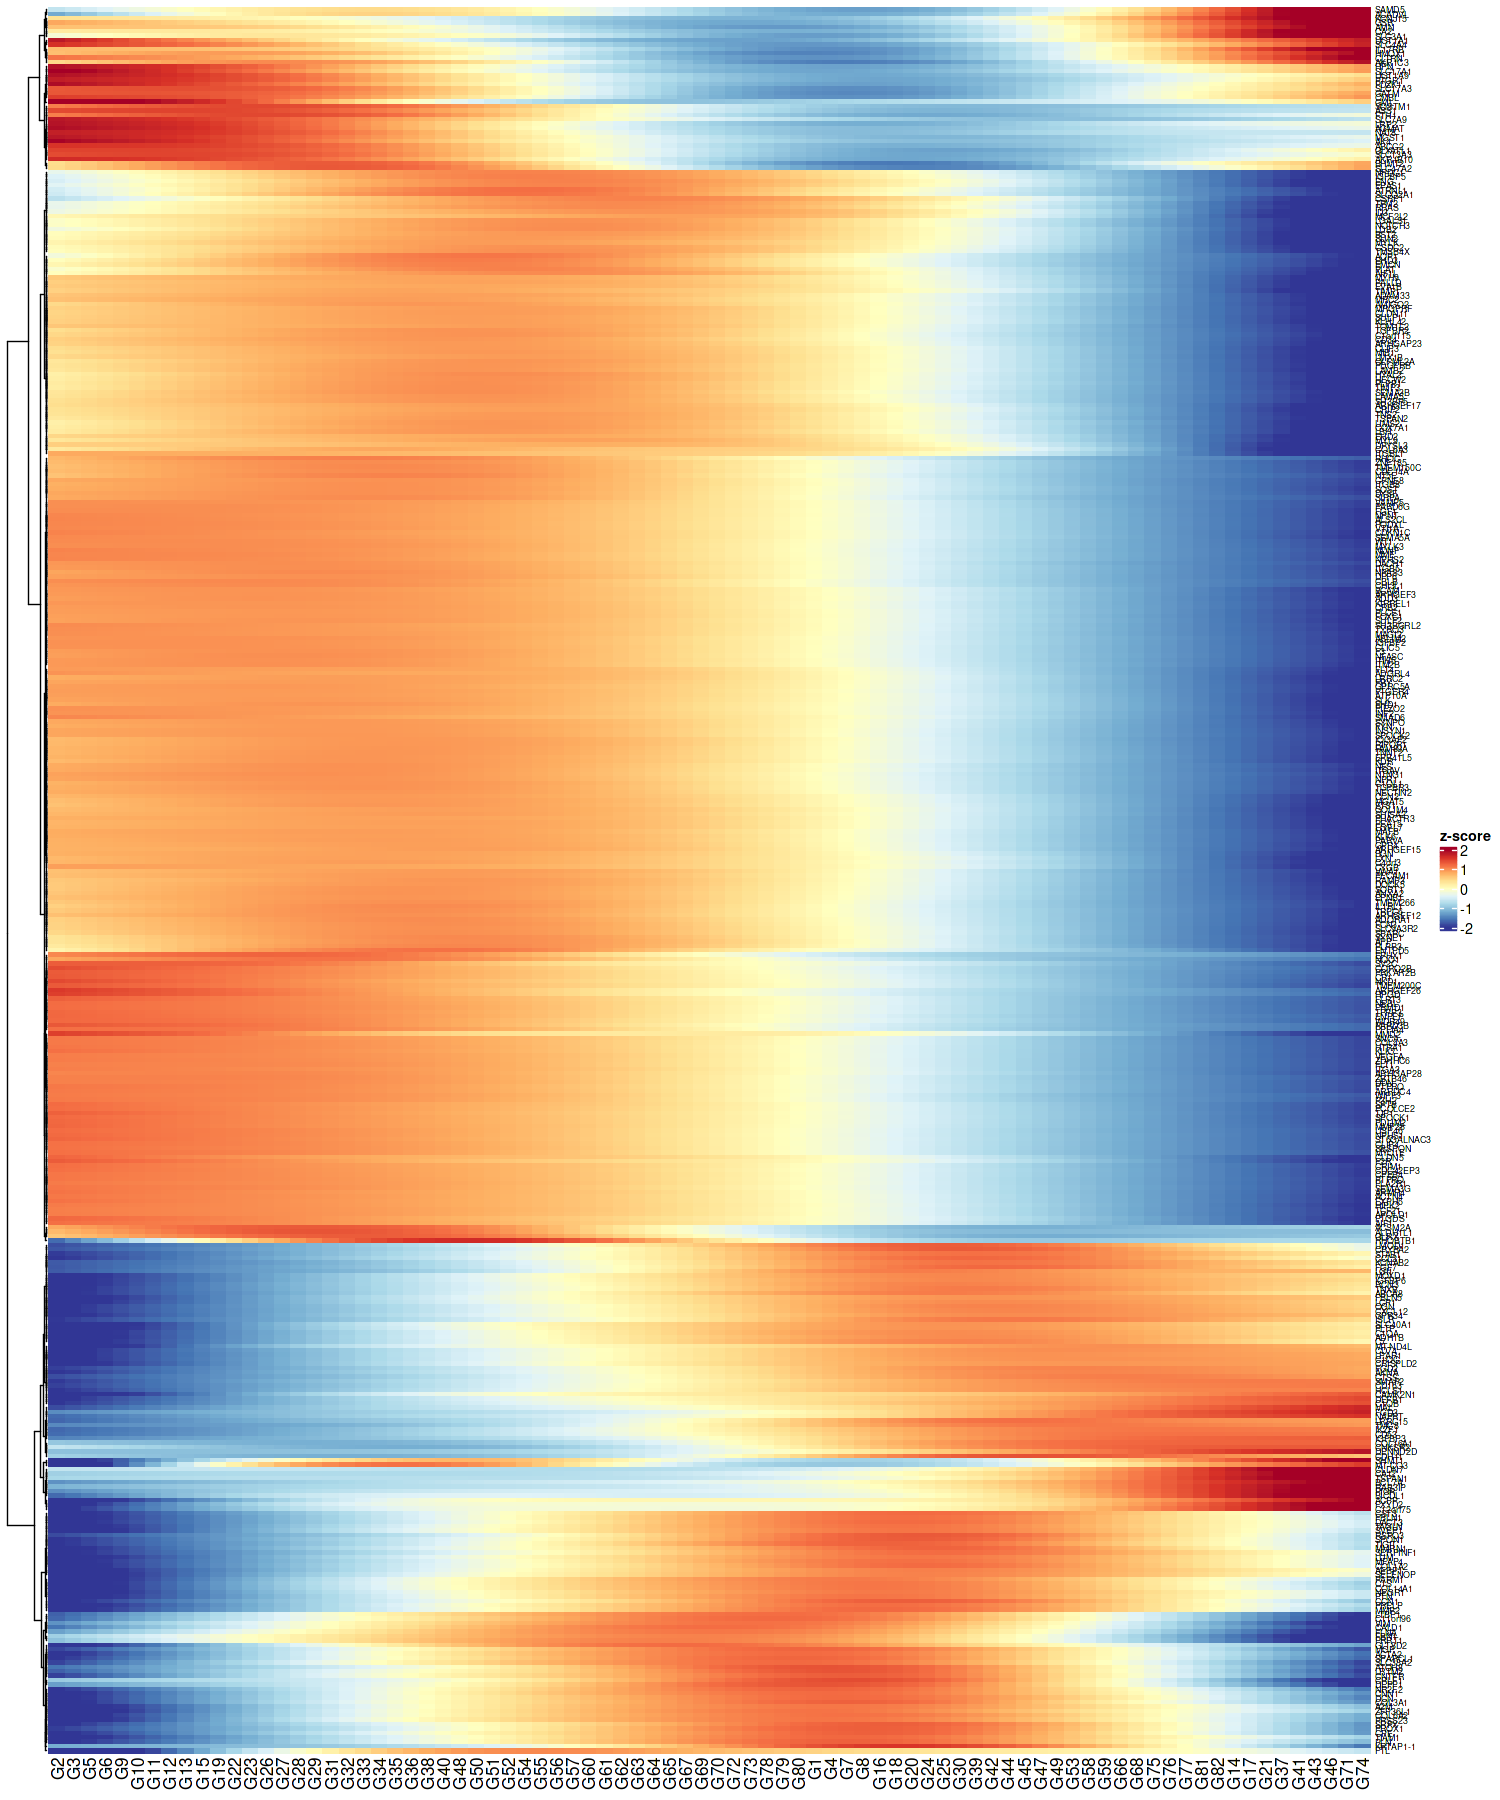

In [27]:
options(repr.plot.width = 15, repr.plot.height = 18, repr.plot.res = 100)
hthc = draw(hthc)

In [28]:
hthc_gene = rownames(pt.matrix)[row_order(hthc)]
hthc_gene = as.data.frame(hthc_gene)
dim(hthc_gene)
head(hthc_gene)
# write.csv(hthc_gene, file = "../../processed_data/version_1/Monocle3/hthc_gene.csv")

[1] 397   1

,hthc_gene
,<chr>
1,SAMD5
2,ACADVL
3,KCNJ15
4,GSR
5,AMN
6,CA2


#### Step 5.2. create column_split based on gene groups

In [29]:
sep_1 = "SLC47A2"
sep_2 = "RHOBTB1"
sep_3 = "C12orf75"
sep_4 = "FTL"

row_split = factor(c(rep(1, grep(sep_1, hthc_gene$hthc_gene)),
                 rep(2, grep(sep_2, hthc_gene$hthc_gene) - grep(sep_1, hthc_gene$hthc_gene)),
                 rep(3, grep(sep_3, hthc_gene$hthc_gene) - grep(sep_2, hthc_gene$hthc_gene)),
                 rep(4, grep(sep_4, hthc_gene$hthc_gene) - grep(sep_3, hthc_gene$hthc_gene))
                ), levels = 1:4)


In [30]:
pt.matrix.2 = pt.matrix[hthc_gene$hthc_gene, ]

In [31]:
# set.seed(123)
#Ward.D2 Hierarchical Clustering
col_fun = colorRamp2(seq(from=-2,to=2,length=11),rev(brewer.pal(11, "RdYlBu")))

hthc_out <- Heatmap(
  pt.matrix.2,
  name                         = "z-score",
  col                          = col_fun,
  show_row_names               = FALSE,
  show_column_names            = FALSE,
  row_title_gp                 = gpar(fontsize = 28, fontface = "bold"),
  clustering_method_rows = "ward.D2",
  row_title_rot                = 0,
  cluster_rows                 = TRUE,
  cluster_row_slices           = FALSE,
  cluster_columns              = FALSE,
  row_split                    = row_split,
    use_raster = TRUE,
    row_gap = unit(c(3), "mm"),
    heatmap_legend_param = list(
    direction = "horizontal",
    legend_width = unit(6, "cm"),
    title_position = "leftcenter",
    fontsize = 20,
    fontface = "bold")
)

png(file.path(plots_path_main, "Heatmap_glom_monocle3.png"), width = 8, height = 16, units = "in", res = 300)
draw(hthc_out, heatmap_legend_side = "bottom")
dev.off()

pdf(file.path(plots_path_main, "Heatmap_glom_monocle3.pdf"), width = 8, height = 16)
draw(hthc_out, heatmap_legend_side = "bottom")
dev.off()

svg(file.path(plots_path_main, "Heatmap_glom_monocle3.svg"), width = 8, height = 16)
draw(hthc_out, heatmap_legend_side = "bottom")
dev.off()

png 
  2

png 
  2

png 
  2

### Step 6. GO BP ORA analysis

In [32]:
# Load the function
suppressMessages(library("gplots"))
suppressMessages(library("clusterProfiler"))
suppressMessages(library("ComplexHeatmap"))
suppressMessages(library(org.Hs.eg.db))

In [33]:
Cluster_df = hthc_gene
Cluster_df$cluster = row_split
colnames(Cluster_df)[1] = c("gene")
write.csv(Cluster_df, file = "../../processed_data/version_1/Monocle3/hthc_gene.csv")

In [34]:
cluster_name_list = unique(Cluster_df$cluster)
# cluster_name_list

ids_list = lapply(cluster_name_list, FUN = function(x){
  cluster_i <- Cluster_df[Cluster_df$cluster == x, ]
  ids <- bitr(cluster_i$gene, fromType = 'SYMBOL', toType = c('SYMBOL', 'ENTREZID'), OrgDb = 'org.Hs.eg.db')
  ids$ENTREZID
})
names(ids_list) = cluster_name_list

# Enrichment analysis with enrichGO Biological Process (BP)
ck <- compareCluster(geneCluster = ids_list, fun = enrichGO,
                     OrgDb = org.Hs.eg.db,
                     # keytype = 'ENTREZID',
                     ont = 'BP',
                     pAdjustMethod = 'BH',
                     pvalueCutoff = 0.05,
                     qvalueCutoff = 0.1)
ck <- setReadable(ck, OrgDb = org.Hs.eg.db, keyType="ENTREZID")

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:many mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(cluster_i$gene, fromType = "SYMBOL", toType = c("SYMBOL", :
“4.92% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns




Attaching package: ‘scales’


The following object is masked from ‘package:viridis’:

    viridis_pal


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


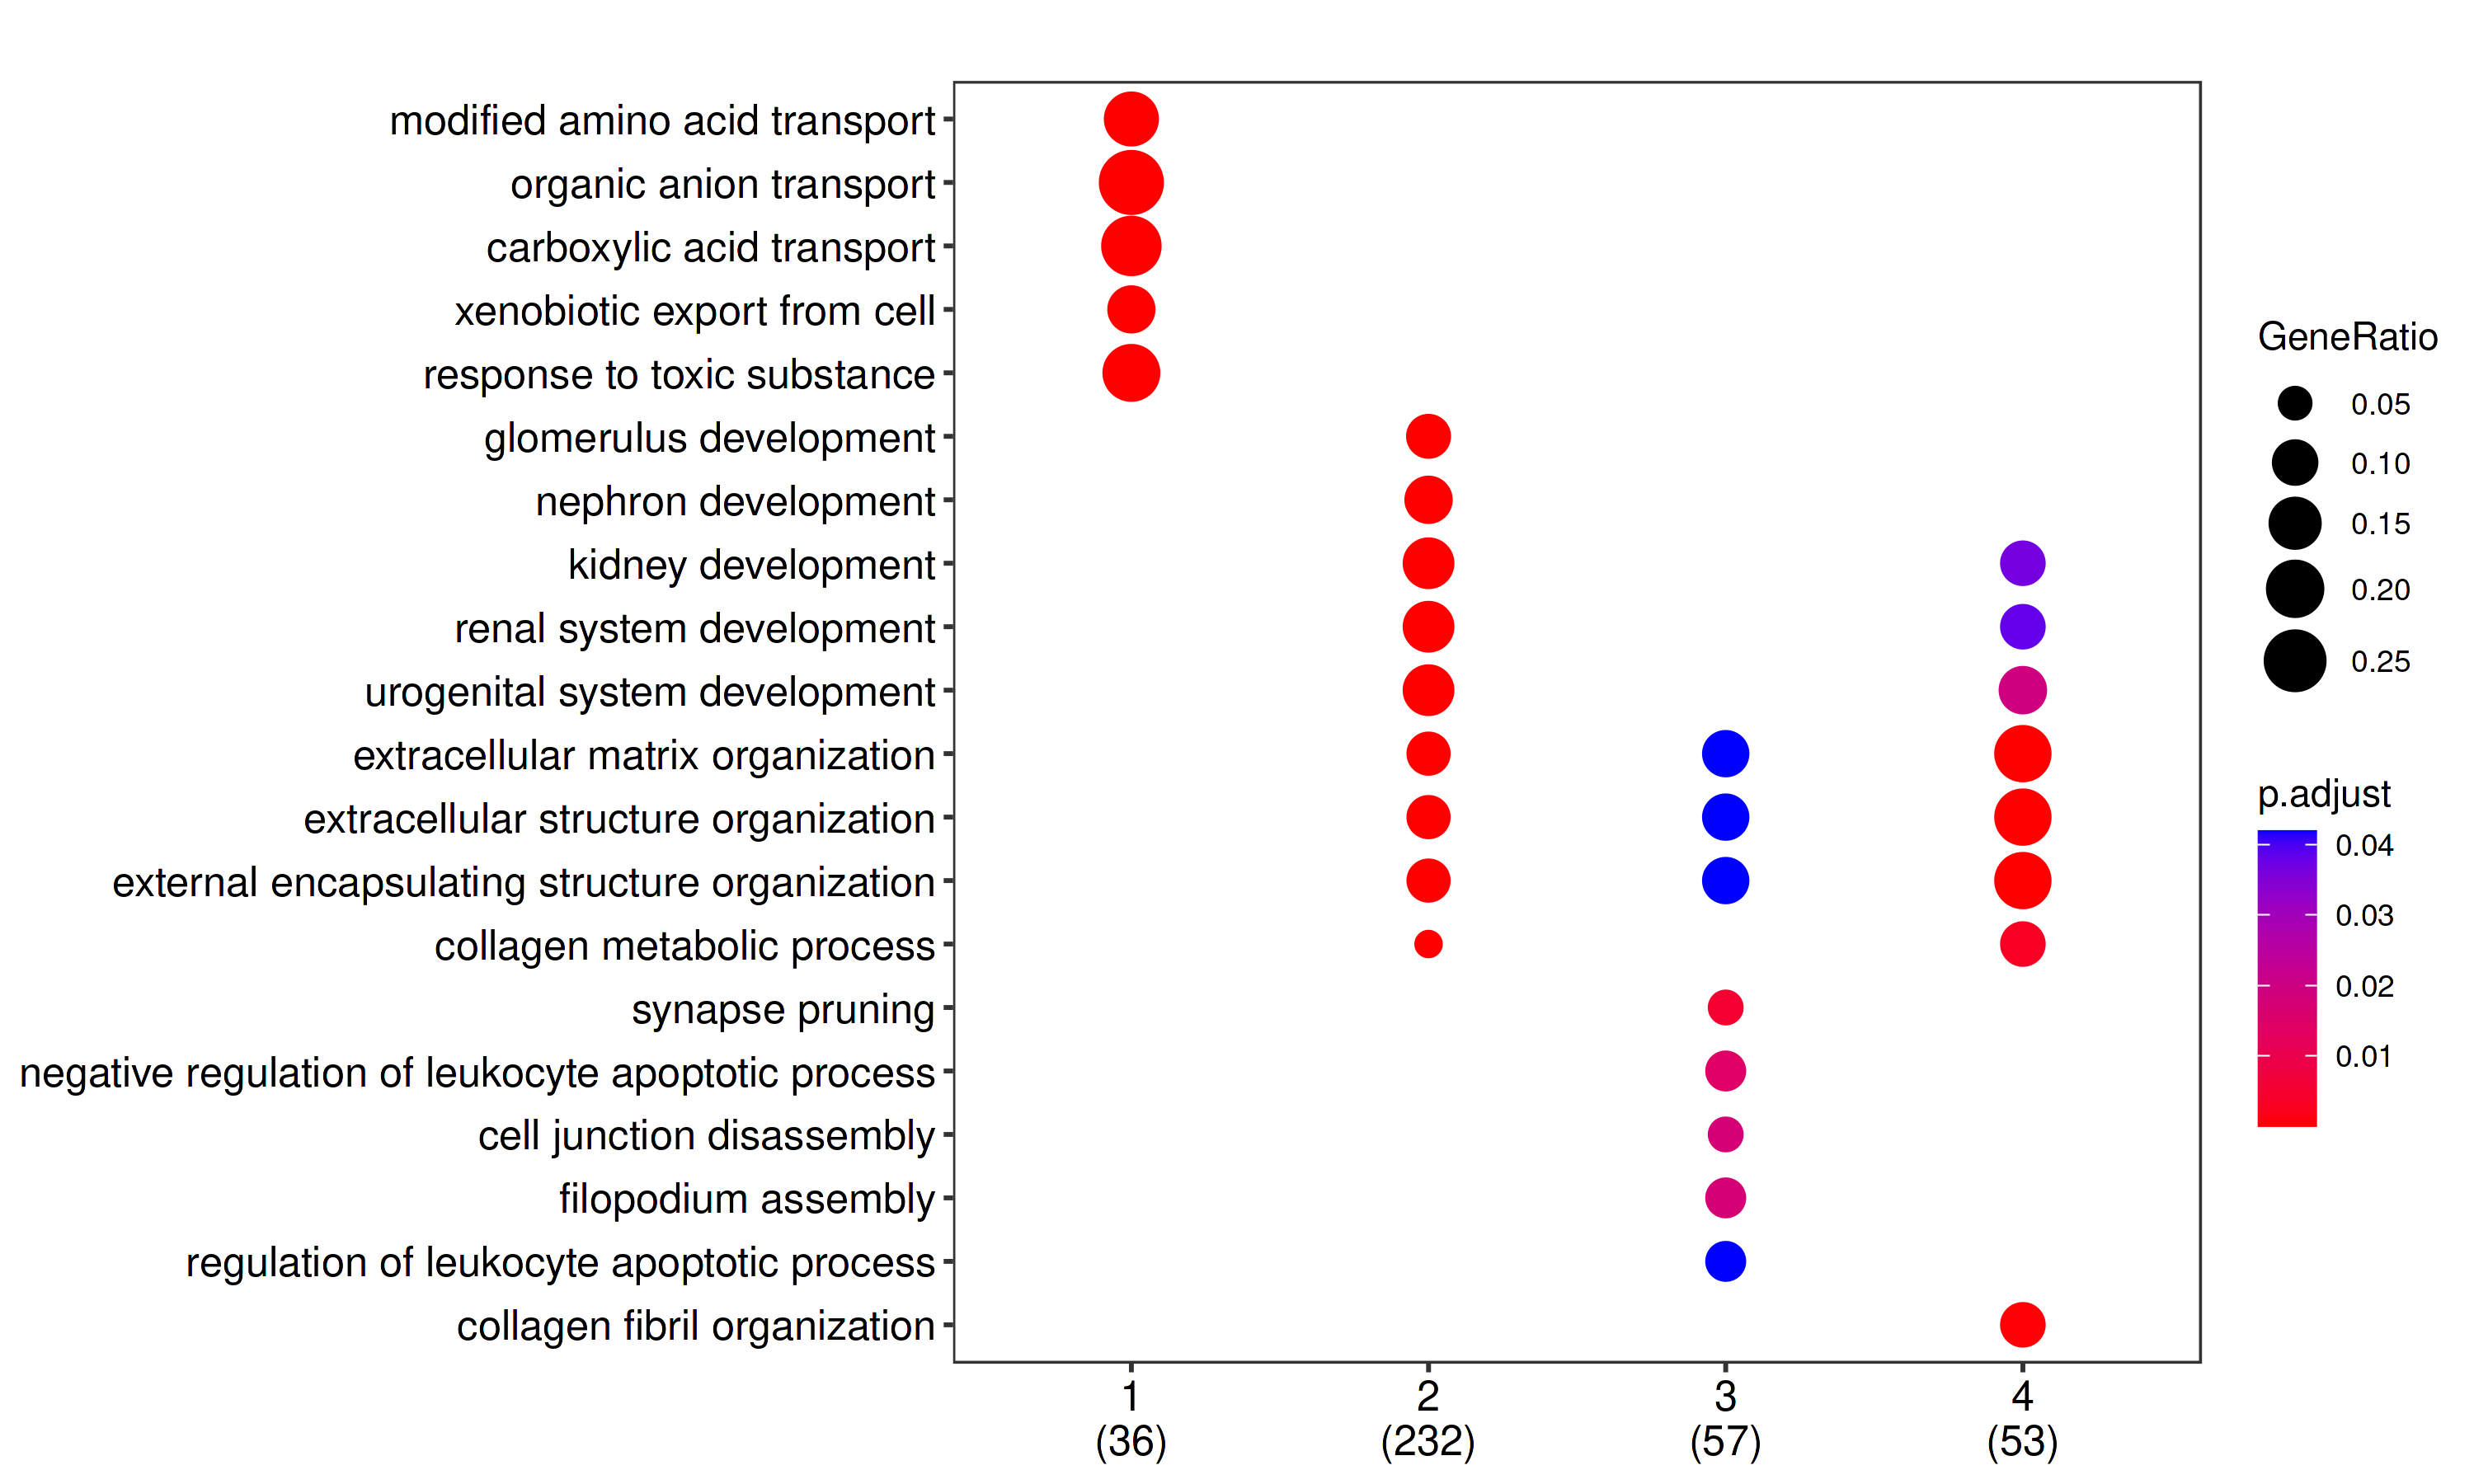

In [35]:
options(repr.plot.width = 10, repr.plot.height = 6, repr.plot.res = 300)
# Plot and visualise the data
p = dotplot(ck)
# adjust the size of y axis labels
library(scales)
p = p + scale_y_discrete(labels = wrap_format(100))
p = p + custom_theme +
#   xlab("Morph-based Glomeruli Subcluster") + 
theme(
    axis.title.x = element_blank(),
#     axis.title.x = element_text(face="bold"), 
      panel.grid.major = element_blank(),
    panel.grid.minor = element_blank() 
)
p

ggsave(file.path(plots_path_supp, "ORA_DotPlot_glom_monocle3.png"), plot = p, width = 10, height = 6, units = "in", dpi = 300)
ggsave(file.path(plots_path_supp, "ORA_DotPlot_glom_monocle3.pdf"), plot = p, width = 10, height = 6, units = "in", dpi = 300)
ggsave(file.path(plots_path_supp, "ORA_DotPlot_glom_monocle3.svg"), plot = p, width = 10, height = 6, units = "in", dpi = 300)

#### Step 6.2. ORA for only cluster 3 and 4

In [ ]:
# Enrichment analysis with enrichGO Biological Process (BP)
ck2 <- compareCluster(geneCluster = ids_list[3:4], fun = enrichGO,
                     OrgDb = org.Hs.eg.db,
                     # keytype = 'ENTREZID',
                     ont = 'BP',
                     pAdjustMethod = 'BH',
                     pvalueCutoff = 0.05,
                     qvalueCutoff = 0.1)


In [ ]:
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 300)
# Plot and visualise the data
p = dotplot(ck2)
# adjust the size of y axis labels
library(scales)
p = p + scale_y_discrete(labels = wrap_format(100))
p = p + custom_theme +
#   xlab("Morph-based Glomeruli Subcluster") + 
theme(
    axis.title.x = element_blank(),
#     axis.title.x = element_text(face="bold"), 
      panel.grid.major = element_blank(),
    panel.grid.minor = element_blank() 
)
p

ggsave(file.path(plots_path_main, "ORA_DotPlot_glom_monocle3_cluster_3_4.png"), plot = p, width = 8, height = 6, units = "in", dpi = 300)
ggsave(file.path(plots_path_main, "ORA_DotPlot_glom_monocle3_cluster_3_4.pdf"), plot = p, width = 8, height = 6, units = "in", dpi = 300)
ggsave(file.path(plots_path_main, "ORA_DotPlot_glom_monocle3_cluster_3_4.svg"), plot = p, width = 8, height = 6, units = "in", dpi = 300)

### Step 7. plot_genes_in_pseudotime

#### Step 7.1. Re-estimate size_factor, following guidance at: https://github.com/cole-trapnell-lab/monocle3/issues/466

In [ ]:
cds <- estimate_size_factors(cds)

In [ ]:
glom_genes <- c("NPHS2", "PODXL", "COL1A2", "COL3A1", "C1QB", "C1QA")
glom_lineage_cds <- cds[rowData(cds)$gene_short_name %in% glom_genes,]
#                        colData(cds)$cell.type %in% c("AFD")]
glom_lineage_cds <- order_cells(glom_lineage_cds, root_cells = colnames(cds[,clusters(cds) == 1]))

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 5, repr.plot.res = 300)
p = plot_genes_in_pseudotime(glom_lineage_cds,panel_order = glom_genes,
#                          color_cells_by="embryo.time.bin",
                         min_expr=0.5, ncol = 2)
p = p + custom_theme +
xlab("Pseudotime") + 
ggtitle(element_blank())  +
scale_color_gradient2 (low=color_palette_glom[1], mid=color_palette_glom[1], high=color_palette_glom[3], name = "Pseudotime")

p

ggsave(file.path(plots_path_main, "plot_gene_pseudotime_glom_avg_monocle3.png"), plot = p, width = 6, height = 5, units = "in", dpi = 300)
ggsave(file.path(plots_path_main, "plot_gene_pseudotime_glom_avg_monocle3.pdf"), plot = p, width = 6, height = 5, units = "in", dpi = 300)
ggsave(file.path(plots_path_main, "plot_gene_pseudotime_glom_avg_monocle3.svg"), plot = p, width = 6, height = 5, units = "in", dpi = 300)

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 100)

plot_cells(cds, genes="NPHS2",cell_size = 6,
show_trajectory_graph=F,
label_cell_groups=FALSE,
label_leaves=FALSE)

In [ ]:
sessionInfo()